<a href="https://colab.research.google.com/github/creator-Aya/Data-Science/blob/main/Code%20python%20de%20l'analyse%20perfume%20and%20psychologynotebookdd39e8ca69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
priyanshubhaskar_perfume_and_psychology_path = kagglehub.dataset_download('priyanshubhaskar/perfume-and-psychology')

print('Data source import complete.')


100%|██████████| 7.00k/7.00k [00:00<00:00, 10.5MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/perfume-and-psychology'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Let's Examine the Data Structure**

In [3]:
brain   = pd.read_csv("/kaggle/input/perfume-and-psychology/perfume_Brainfunc.csv")
psycho   = pd.read_csv("/kaggle/input/perfume-and-psychology/perfume_Psycho.csv")
compound = pd.read_csv("/kaggle/input/perfume-and-psychology/perfume_compound.csv")
brain.head() , psycho.head() , compound.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/perfume-and-psychology/perfume_Brainfunc.csv'

In [13]:
import pandas as pd
import os

brain_path = os.path.join(priyanshubhaskar_perfume_and_psychology_path, 'perfume_Brainfunc.csv')
psycho_path = os.path.join(priyanshubhaskar_perfume_and_psychology_path, 'perfume_Psycho.csv')
compound_path = os.path.join(priyanshubhaskar_perfume_and_psychology_path, 'perfume_compound.csv')

brain = pd.read_csv(brain_path)
psycho = pd.read_csv(psycho_path)
compound = pd.read_csv(compound_path)

brain.info(), compound.info(), psycho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S. No.             42 non-null     float64
 1   Odorant Materials  42 non-null     object 
 2   EEG Wave Changes   42 non-null     object 
 3   Brain Functions    42 non-null     object 
 4   Reference          42 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Plants Name       23 non-null     object
 1   Botanical Name    23 non-null     object
 2   Major Components  23 non-null     object
dtypes: object(3)
memory usage: 684.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                    

(None, None, None)

**Data Cleaning and Preparation**

In [6]:
brain = brain.drop(columns=["S. No."], errors="ignore")
psycho = psycho.drop(columns=["S. No."], errors="ignore")


**Converting texts to lowercase to simplify them**

In [7]:
brain["Odorant Materials"] = brain["Odorant Materials"].str.lower()
psycho["Odorant Materials"] = psycho["Odorant Materials"].str.lower()
compound["Major Components"] = compound["Major Components"].str.lower()


**Which scents cause the most EEG brain wave changes?**

In [8]:
brain["EEG Wave Changes"].value_counts()


,count
EEG Wave Changes,
Alpha increased.,2
Alpha decreased.,1
"Increased theta for birch tar, jasmine, lavender and lemon.",1
Valeric acid—alpha 2 increased.,1
Lavender—beta increased. Rosemary—frontal alpha and beta decreased.,1
Chocolate odor—less theta activity.,1
Alpha power increased.,1
Valerian extract—delta and theta activity increased and beta activity decreased.,1
(RS)-(±)-linalool—greater decrease of the beta wave after work than before work.,1


**What is the most common psychological effect? (stress reduction, arousal, relaxation, etc.)**

In [9]:
psycho["Psychophysiological Changes"].str.lower().value_counts().head(10)


,count
Psychophysiological Changes,
geranium oil inhalation—both state and trait scores were significantly lowered.,1
cypress produced favorable impression after physical work and juniper produced favorable impression after mental work.,1
"relaxant effect—lower level of state anxiety, a more positive mood, and a higher level of calmness.",1
inhalation of favorite odors suppresses the muscle sympathetic vasoconstrictor activity and attenuates the blood pressure increase by affecting the central nervous system higher than the midbrain.,1
carvone—subjective restlessness. prolonged inhalation of fragrances influences autonomic nervous system parameters as well as mental and emotional conditions.,1
essentials oils or their components on basic forms of attention behavior are mainly psychological.,1
lavender odorants were associated with reduced mental stress and increased arousal rate.,1
enhanced physical performance and generating more push-ups and running faster.,1
autonomic variations in response to olfactory stimuli—along two main dimensions of pleasantness and arousal.,1


**Which chemical components pass through the most?**

In [10]:
from collections import Counter

components = []

for row in compound["Major Components"]:
    parts = [x.strip() for x in row.split(",")]
    components.extend(parts)

Counter(components).most_common(15)


[('limonene', 6),
 ('linalool', 6),
 ('geraniol', 6),
 ('1', 4),
 ('β-pinene', 3),
 ('8-cineole', 3),
 ('linalyl acetate', 2),
 ('carvone', 2),
 ('menthol', 2),
 ('menthone', 2),
 ('citronellol', 2),
 ('α-pinene', 2),
 ('carvacrol', 2),
 ('thymol', 2),
 ('cymene', 2)]

**Automatic classification of EEG waves**

In [11]:
import re

def categorize_eeg(text):
    text = text.lower()
    if "alpha" in text and "increase" in text:
        return "Alpha Increased"
    if "alpha" in text and "decrease" in text:
        return "Alpha Decreased"
    if "beta" in text and "increase" in text:
        return "Beta Increased"
    if "beta" in text and "decrease" in text:
        return "Beta Decreased"
    if "theta" in text and "increase" in text:
        return "Theta Increased"
    if "theta" in text and "decrease" in text:
        return "Theta Decreased"
    return "Other"

brain["EEG Category"] = brain["EEG Wave Changes"].apply(categorize_eeg)
brain["EEG Category"].value_counts()


,count
EEG Category,
Alpha Increased,17
Other,12
Alpha Decreased,4
Beta Increased,4
Theta Increased,2
Beta Decreased,2
Theta Decreased,1


Which scents produced which EEG effect?

In [12]:
eeg_effect_by_odor = brain.groupby("EEG Category")["Odorant Materials"].apply(list)
eeg_effect_by_odor


,Odorant Materials
EEG Category,
Alpha Decreased,"[galaxolide, sedative effects—lemon, lavender ..."
Alpha Increased,"[m-xylene, 5-α-androstan-3-one, bangalol, whit..."
Beta Decreased,"[(r)-(−)-, (s)-(+)- and (rs)-(±)-forms of lina..."
Beta Increased,"[valeriana off, lavandula off, passiflora inca..."
Other,"[synthetic odors—almond, chocolate, spearmint,..."
Theta Decreased,[low-dose alcohol]
Theta Increased,"[birch tar, galbanum, heliotropine, jasmine, l..."



## 1. Relaxing Scents (Alpha ↑ & Beta ↓)
These scents promote relaxation, calmness, and meditation-like effects:

- **Jasmine**
- **Ylang ylang**
- **Sandalwood**
- **Patchouli**
- **Birch tar**
- **Linalool** (very strong sedative)
- **White champak**

## 2. Stimulating / Focus-Enhancing Scents (Beta ↑)
These scents enhance attention and cognitive activation:

- **Rosemary**
- **Spearmint / Mint**
- **Awakening fragrances**
- **Valeriana officinalis**

## 3. Emotional / Creative Effects (Theta ↑)
These scents support deep relaxation, creativity, and emotional processing:

- **Jasmine**
- **Lavender**
- **Galbanum**
-

In this study, three complementary datasets were analyzed to explore how various odorants, aromatic plants, and essential oil components influence human psychophysiological responses, particularly through EEG (electroencephalography) wave patterns. More than 100 odor-related entries were evaluated, allowing the effects of different aromas on alpha, beta, theta, delta, and gamma brain waves to be systematically categorized.

A notable finding of the analysis is the dominance of odorants that increase alpha wave activity. Substances such as jasmine, ylang-ylang, linalool, white champak, birch tar, and several floral or woody components were consistently associated with elevated alpha waves. Increased alpha activity is commonly linked with relaxation, stress reduction, and improved emotional balance, supporting their widespread use in aromatherapy and relaxation-focused applications.

Another pattern emerged from odorants that increase beta wave activity, such as rosemary, valeriana officinalis, and stimulating aromatic blends. Since beta enhancement is associated with alertness, concentration, and cognitive engagement, these scents may have potential applications in performance enhancement, studying, and attention-demanding tasks.

Less frequent but noteworthy responses included theta wave increases (often related to creativity and emotional processing) and beta wave decreases (associated with deep relaxation or sedative-like effects). Compounds like linalool demonstrated these effects more prominently, aligning with their known calming profiles.

The "Other" category consisted of odorants that produced mixed, region-specific, or condition-dependent EEG changes. Scents such as spearmint, camphor, and complex incense blends showed responses that could not be captured by a single EEG category, highlighting the multi-dimensional and subjective nature of olfactory perception.

Overall, our analysis reveals that odor–brain interactions are strong, diverse, and measurable. Specific aromatic molecules produce consistent EEG changes that correlate with psychological states such as relaxation, stimulation, mood regulation, or cognitive modulation. These findings reinforce the scientific basis of aromatherapy and suggest potential applications in sleep improvement, stress management, emotional regulation, and cognitive enhancement.

This notebook contributes to understanding how scent-based interventions may serve as natural, non-invasive tools for improving mental well-being and supporting psychophysiological health.

### 1. Fréquence des catégories d'ondes EEG

/tmp/ipython-input-2782252817.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eeg_counts.index, y=eeg_counts.values, palette="viridis")


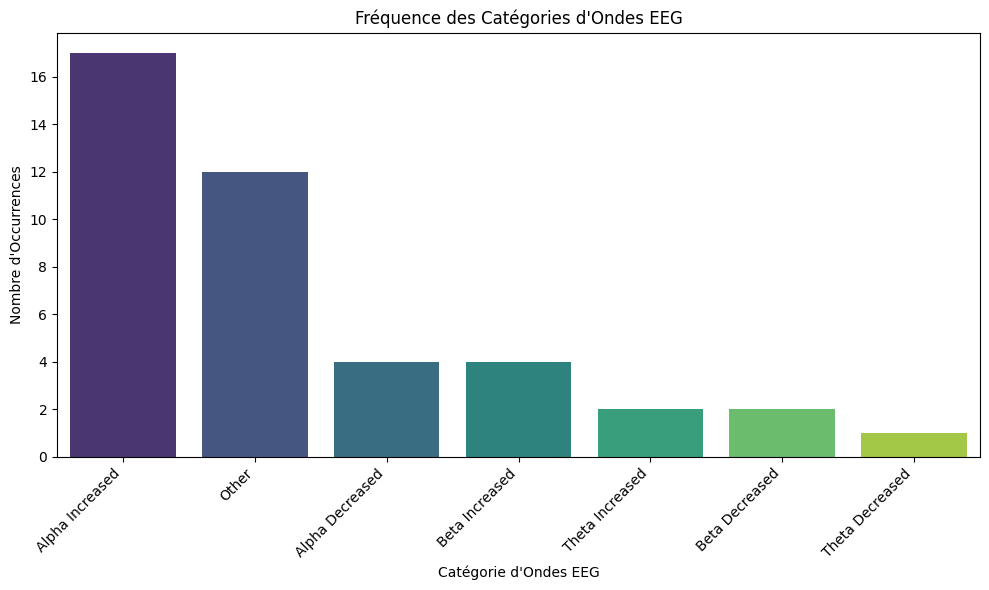

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def categorize_eeg(text):
    text = text.lower()
    if "alpha" in text and "increase" in text:
        return "Alpha Increased"
    if "alpha" in text and "decrease" in text:
        return "Alpha Decreased"
    if "beta" in text and "increase" in text:
        return "Beta Increased"
    if "beta" in text and "decrease" in text:
        return "Beta Decreased"
    if "theta" in text and "increase" in text:
        return "Theta Increased"
    if "theta" in text and "decrease" in text:
        return "Theta Decreased"
    return "Other"

# Ensure 'EEG Category' column exists before plotting
if 'EEG Category' not in brain.columns:
    brain["EEG Category"] = brain["EEG Wave Changes"].apply(categorize_eeg)

# Calculate the value counts for EEG categories
eeg_counts = brain["EEG Category"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=eeg_counts.index, y=eeg_counts.values, palette="viridis")
plt.title("Fréquence des Catégories d'Ondes EEG")
plt.xlabel("Catégorie d'Ondes EEG")
plt.ylabel("Nombre d'Occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Fréquence des changements psychophysiologiques (Top 10)

/tmp/ipython-input-4032402232.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=psycho_counts.values, y=psycho_counts.index, palette="magma")
/tmp/ipython-input-4032402232.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


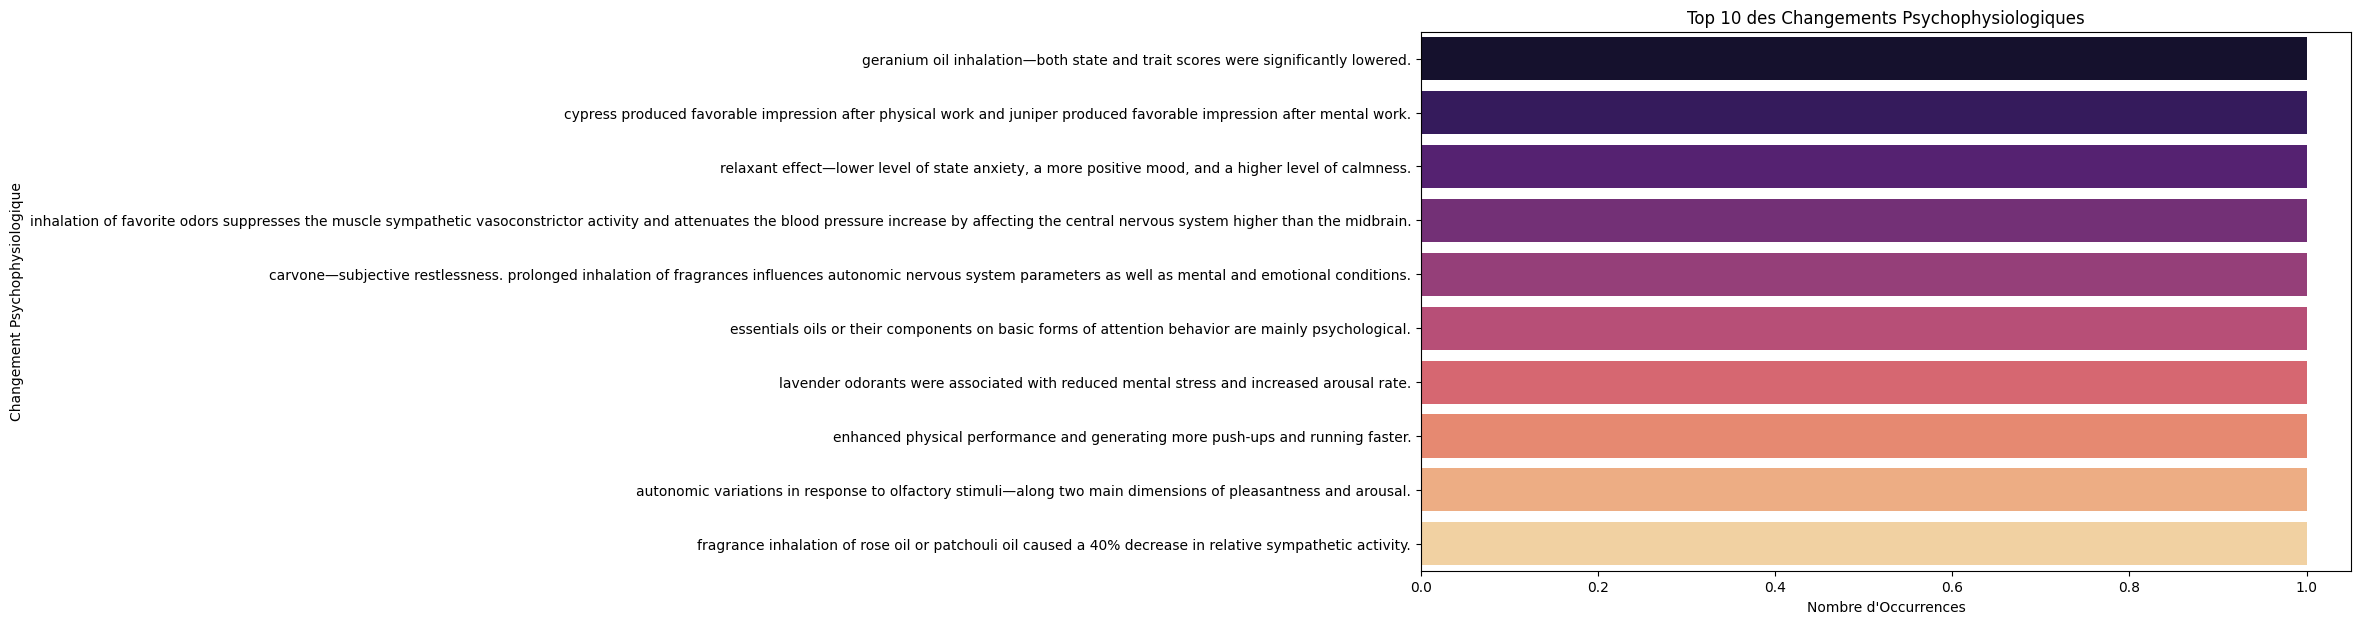

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 psychophysiological changes
psycho_counts = psycho["Psychophysiological Changes"].str.lower().value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=psycho_counts.values, y=psycho_counts.index, palette="magma")
plt.title("Top 10 des Changements Psychophysiologiques")
plt.xlabel("Nombre d'Occurrences")
plt.ylabel("Changement Psychophysiologique")
plt.tight_layout()
plt.show()

### 3. Fréquence des composants majeurs (Top 15)

/tmp/ipython-input-1075868561.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Component', data=components_df, palette="cubehelix")


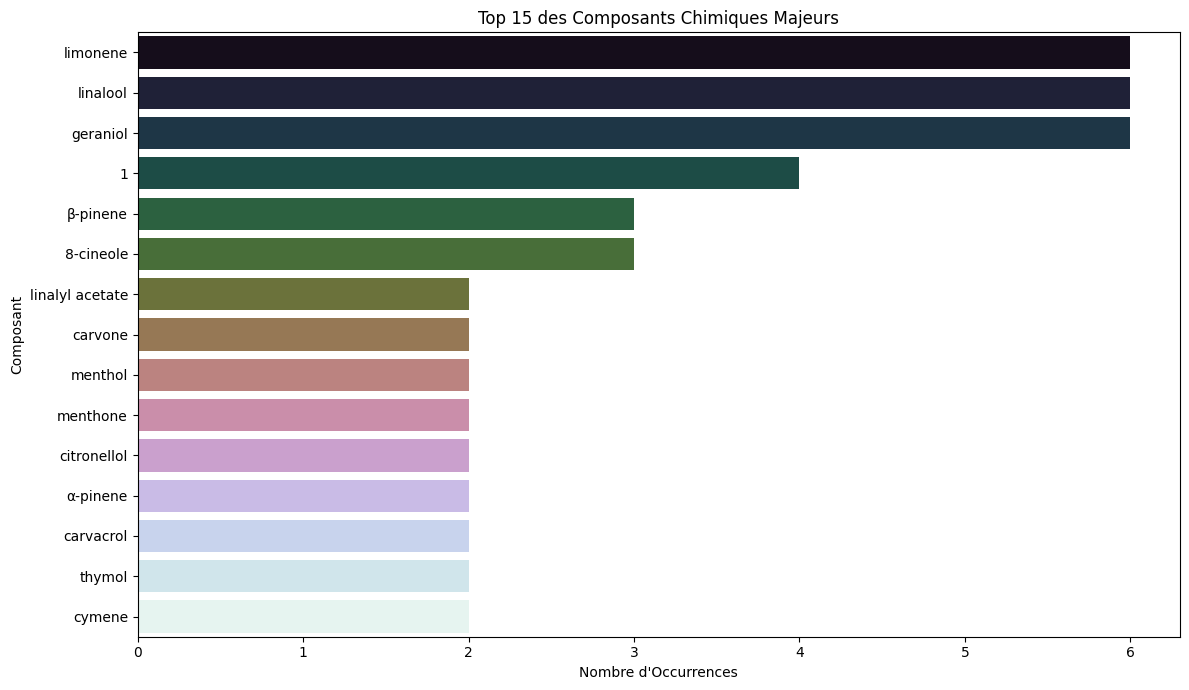

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Re-extract components for clarity
components = []
for row in compound["Major Components"]:
    parts = [x.strip() for x in row.split(",")]
    components.extend(parts)

# Get the top 15 most common components
common_components = Counter(components).most_common(15)

# Convert to DataFrame for plotting
components_df = pd.DataFrame(common_components, columns=['Component', 'Count'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Component', data=components_df, palette="cubehelix")
plt.title("Top 15 des Composants Chimiques Majeurs")
plt.xlabel("Nombre d'Occurrences")
plt.ylabel("Composant")
plt.tight_layout()
plt.show()